In [70]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [71]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [72]:
x_Train=x_train_image.reshape(60000, 784).astype('float32')
x_Test=x_test_image.reshape(10000, 784).astype('float32')

In [73]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [74]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [76]:
model = Sequential()

In [77]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [78]:
model.add(Dropout(0.5))

In [79]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))

In [80]:
model.add(Dropout(0.5))

In [81]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [82]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 23s - loss: 0.3641 - acc: 0.8858 - val_loss: 0.1344 - val_acc: 0.9605
Epoch 2/10
 - 21s - loss: 0.1586 - acc: 0.9523 - val_loss: 0.0989 - val_acc: 0.9710
Epoch 3/10
 - 22s - loss: 0.1179 - acc: 0.9627 - val_loss: 0.0879 - val_acc: 0.9737
Epoch 4/10
 - 21s - loss: 0.0984 - acc: 0.9698 - val_loss: 0.0872 - val_acc: 0.9731
Epoch 5/10
 - 22s - loss: 0.0834 - acc: 0.9738 - val_loss: 0.0811 - val_acc: 0.9766
Epoch 6/10
 - 22s - loss: 0.0760 - acc: 0.9767 - val_loss: 0.0801 - val_acc: 0.9761
Epoch 7/10
 - 22s - loss: 0.0649 - acc: 0.9791 - val_loss: 0.0767 - val_acc: 0.9761
Epoch 8/10
 - 22s - loss: 0.0590 - acc: 0.9810 - val_loss: 0.0830 - val_acc: 0.9758
Epoch 9/10
 - 23s - loss: 0.0546 - acc: 0.9822 - val_loss: 0.0712 - val_acc: 0.9793
Epoch 10/10
 - 24s - loss: 0.0525 - acc: 0.9836 - val_loss: 0.0707 - val_acc: 0.9806


In [85]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

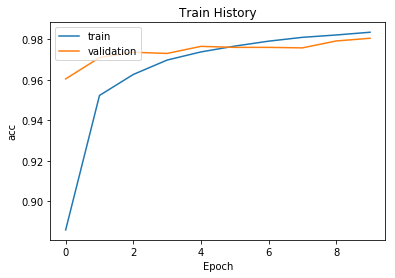

In [86]:
show_train_history(train_history,'acc','val_acc')

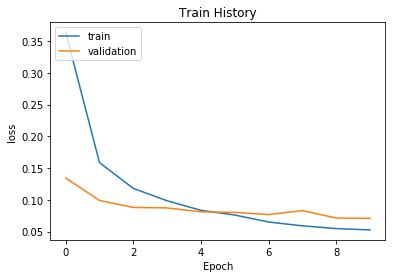

In [87]:
show_train_history(train_history,'loss','val_loss')

In [88]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 4s 431us/step

accuracy= 0.9808


In [25]:
prediction=model.predict_classes(x_Test)

In [26]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict=" +str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

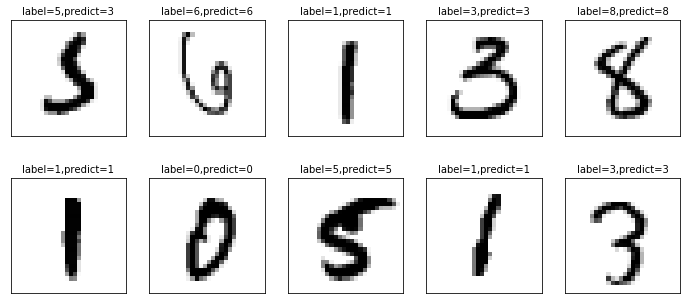

In [89]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [90]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,2,1,0,2,4,9,0
3,0,0,2,995,0,0,0,3,6,4
4,1,1,5,1,960,0,3,0,3,8
5,3,0,0,16,1,851,7,1,10,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,7,1,0,0,987,6,9
8,4,0,3,8,2,1,1,2,952,1


In [91]:
df=pd.DataFrame({'label':y_test_label, 'prediction':prediction})
df[:2]

,label,prediction
0,7,7
1,2,2


In [92]:
df[(df.label==5)&(df.prediction==3)]

,label,prediction
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


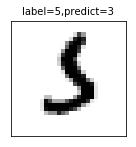

In [93]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)